In [1]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


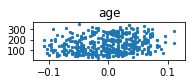

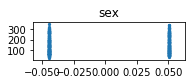

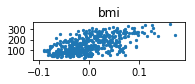

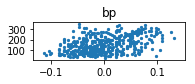

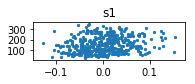

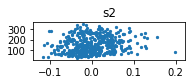

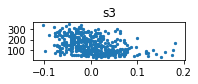

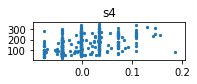

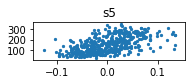

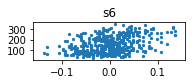

In [4]:
"""load-diabetes"""
diabetes_data = ds.load_diabetes()
x_data = diabetes_data.data
y_data = diabetes_data.target
name_data = diabetes_data.feature_names
#print(boston_data)
print(x_data.shape)
print(y_data.shape)
print(name_data)

for i in range(len(x_data[0])):
    plt.subplot(5,2,i+1)
    plt.scatter(x_data[:,i], y_data, s =5)
    plt.title(name_data[i])
    plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=125)

Linear Regression


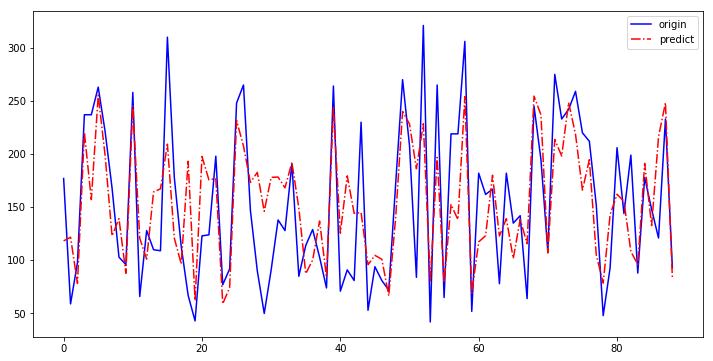

mean_absolute_error:  41.37502359649063
mean_squared_error:  2529.5677300198367
median_absolute_error:  38.55300702618847
explained_variance_score:  0.5370372130358156
r2_score:  0.5367742640727573


In [6]:

"""Linear Regression"""
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

clf = linear_model.LinearRegression()

clf.fit(X_train, Y_train)

print("Linear Regression")
lr_y_predict = clf.predict(X_test)

#compare true_test with predict_test

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), lr_y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, lr_y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, lr_y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, lr_y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, lr_y_predict))
print('r2_score: ', r2_score(Y_test, lr_y_predict))

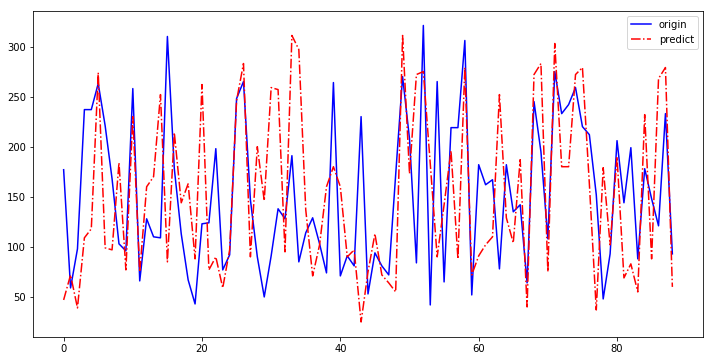

mean_absolute_error:  68.92134831460675
mean_squared_error:  7699.730337078651
median_absolute_error:  54.0
explained_variance_score:  -0.4099720044515822
r2_score:  -0.41000899462241525


In [7]:
"""CART"""
from sklearn import tree

clf = tree.DecisionTreeRegressor()

clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))

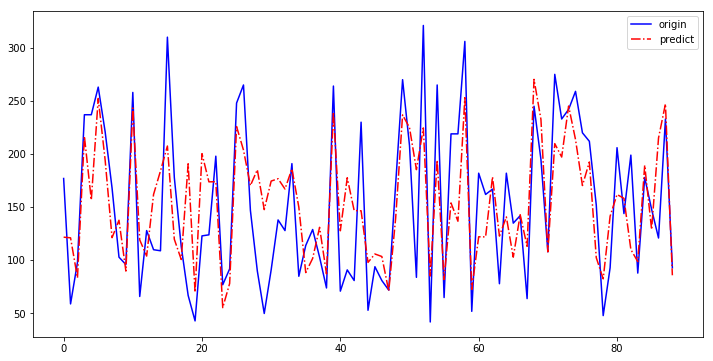

mean_absolute_error:  41.998127960671404
mean_squared_error:  2577.23545909465
median_absolute_error:  37.65638663175463
explained_variance_score:  0.5283678330752684
r2_score:  0.5280451367129266


In [8]:
"""Bayes"""
from sklearn import linear_model

clf = linear_model.BayesianRidge()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


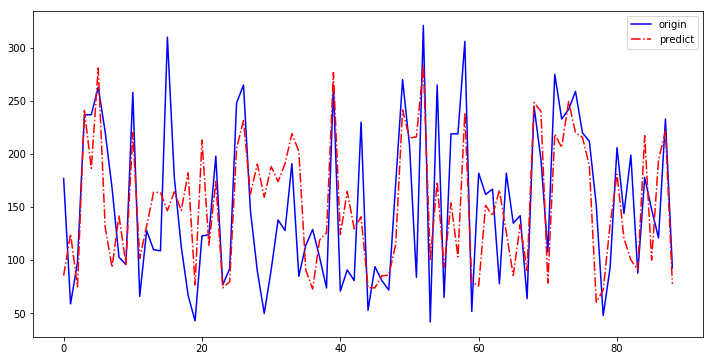

mean_absolute_error:  45.89438202247191
mean_squared_error:  3336.6485955056182
median_absolute_error:  37.900000000000006
explained_variance_score:  0.38902778676202243
r2_score:  0.38897801278814925


In [10]:
"""randomforest"""
from sklearn import ensemble

clf = ensemble.RandomForestRegressor(n_estimators=20)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


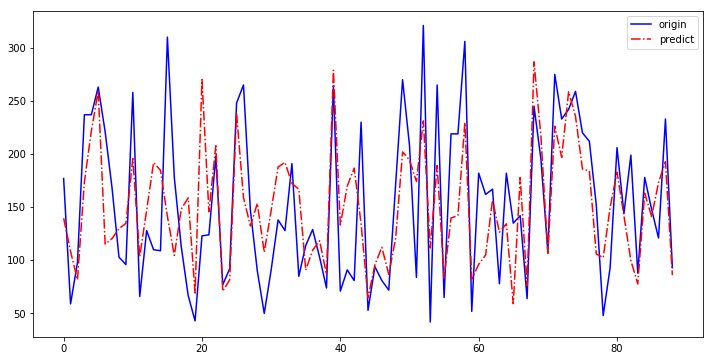

mean_absolute_error:  45.59550561797753
mean_squared_error:  3210.270561797753
median_absolute_error:  38.80000000000001
explained_variance_score:  0.41298386252935915
r2_score:  0.412120922533011


In [11]:
"""KNN"""
from sklearn import neighbors

clf = neighbors.KNeighborsRegressor()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


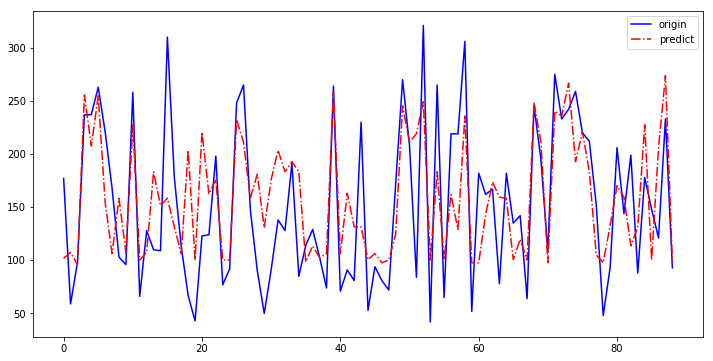

mean_absolute_error:  44.00859289306891
mean_squared_error:  3004.75424605618
median_absolute_error:  38.33333333333334
explained_variance_score:  0.45556187572620677
r2_score:  0.44975598779520864


In [12]:
"""AdaBoost"""
from sklearn import ensemble

clf = ensemble.AdaBoostRegressor(n_estimators=100)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))
